# Graduate Admission Prediction

![Admissions Image]('C:\Users\murega\Desktop\Data_Analysis\university_admissions\admission.jpg' "Admissions Image")

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

**The dataset was gotten from https://www.kaggle.com/datasets/goyaladi/iit-admissions-dataset**

In [2]:
df = pd.read_csv('student_data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## Understanding the Data

In [3]:
#identifying columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
#getting summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [5]:
#checking for any null values in the dataset
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#checking for any duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis

1. GRE scores are out of 340
2. TOEFL scores out of 120
3. University Rating out of 5
4. SOP is Statement of Purpose out of 5
5. LOR is Letter of Recommendation out of 5
6. CGPA is the Undergraduate GPA score and is out of 10
7. Research (Experience) is either 0 or 1
8. Chance of Admit is from 0 to 1

<Axes: xlabel='GRE Score', ylabel='Density'>

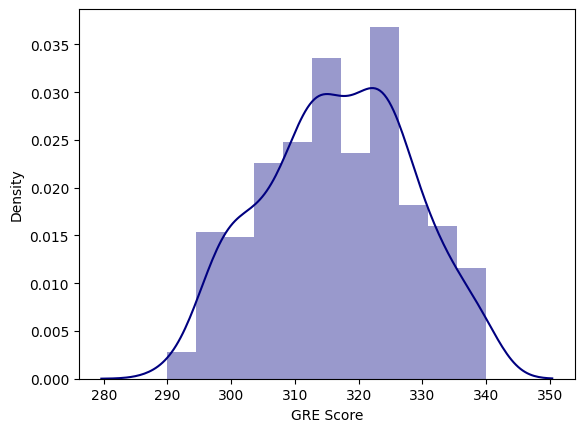

In [7]:
#visualizing the GRE scores distribution
sns.distplot(df['GRE Score'], color='navy')

**We can observe that majority of the students had GRE scores between 305 and 330 out of a possible score of 340**

<Axes: xlabel='TOEFL Score', ylabel='Density'>

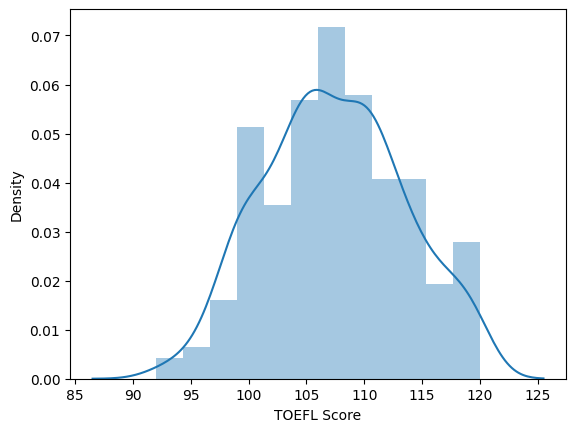

In [8]:
#visualizing the distribution of TOEFL Scores
sns.distplot(df['TOEFL Score'])

**Majority of the students scored between 105 and 110 out of a possible 120**

([<matplotlib.axis.XTick at 0x1bec0dc85d0>,
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0'),
  Text(5.5, 0, '5.5'),
  Text(6.0, 0, '6.0'),
  Text(6.5, 0, '6.5'),
  Text(7.0, 0, '7.0'),
  Text(7.5, 0, '7.5'),
  Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5'),
  Text(10.0, 0, '10.0')])

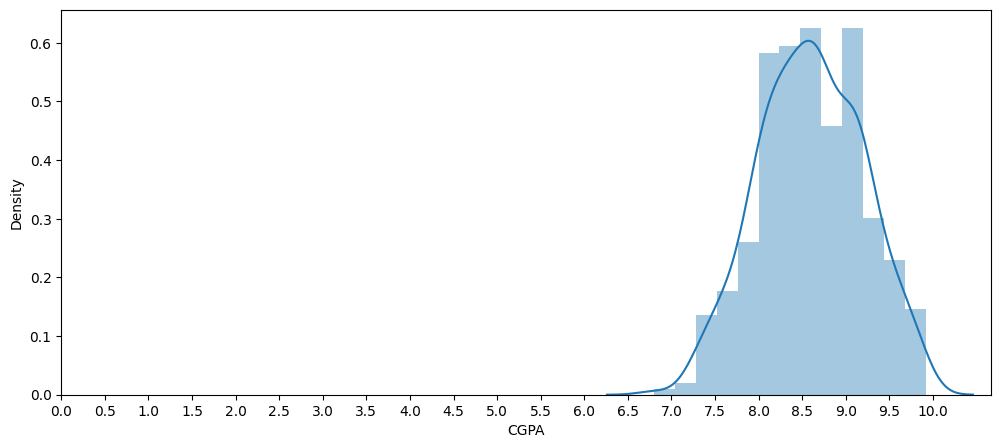

In [9]:
#visualizing the distribution of the GPA score
plt.figure(figsize=(12,5))
sns.distplot(df['CGPA'])
plt.xticks([i * 0.5 for i in range(21)])

**Majority of the students had a GPA Score of between 8.0 and 9.0 of a possible 10**

In [10]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
df = df.drop('Serial No.', axis=1)

<Axes: >

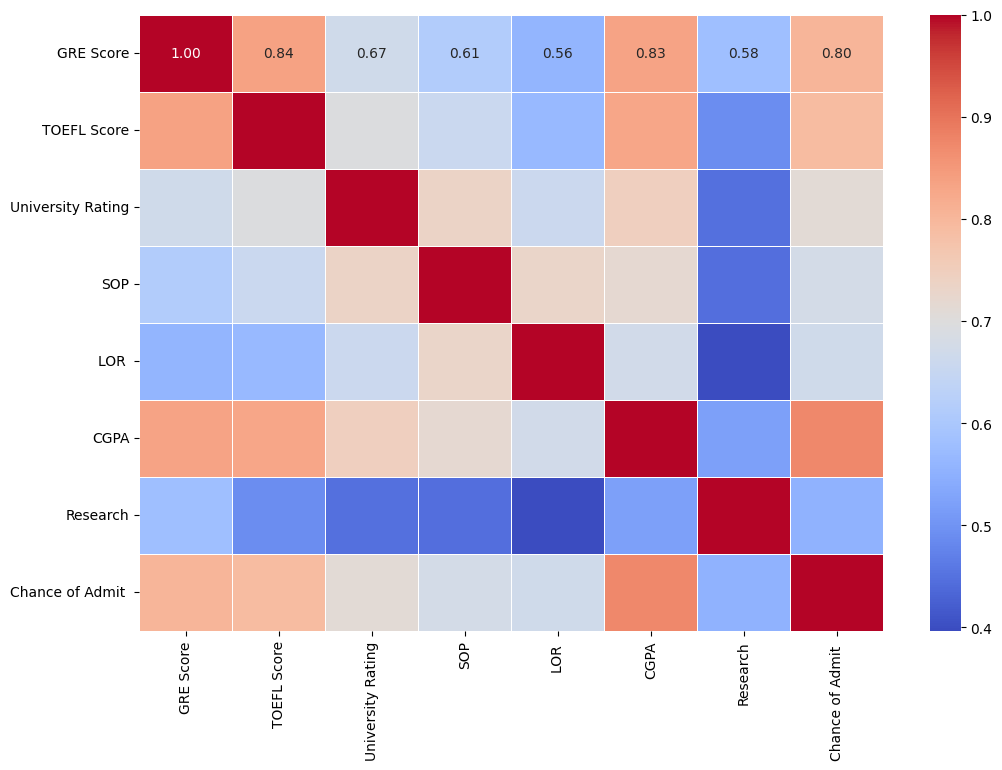

In [12]:
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

## K-Means Clustering

In [13]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [14]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [16]:
#selecting features from the dataset into a new variable
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6]]

In [17]:
#subtracting the values into an array table
x = np.array(x)

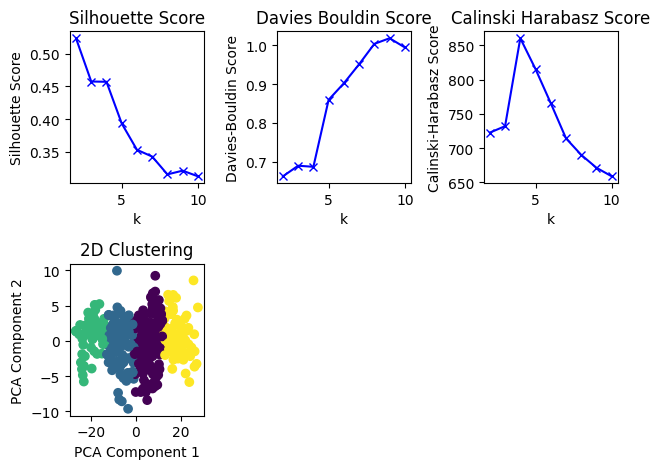

In [18]:
#finding the optimal number of clusters

#using the silhouette score to find the optimal number of clusters
from sklearn.decomposition import PCA
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    labels = kmeanModel.labels_
    silhouette_scores.append(silhouette_score(x, labels))
plt.subplot(2, 3, 1)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

#using the Davies-Bouldin score to find the optimal number of clusters
db_scores = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    labels = kmeanModel.labels_
    db_scores.append(davies_bouldin_score(x, labels))

plt.subplot(2, 3, 2)
plt.plot(K, db_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies Bouldin Score')

#using the Calinski-Harabasz score to find the optimal number of clusters
ch_scores = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    labels = kmeanModel.labels_
    ch_scores.append(calinski_harabasz_score(x, labels))

plt.subplot(2, 3, 3)
plt.plot(K, ch_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski Harabasz Score')

#Visual assessment using PCA for dimensonality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.subplot(2, 3, 4)
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(x)
labels = kmeanModel.labels_
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Clustering')

plt.tight_layout()
plt.show()

**From the charts above we can observe that 4 is the optimal clusters**

In [19]:
#implementing K-means

#defining the model
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
#fitting the model
kmeans_predict = kmeans_model.fit_predict(x)

In [20]:
df['Cluster'] = kmeans_predict

In [21]:
df['Cluster'].value_counts()

Cluster
2    141
0    123
1     73
3     63
Name: count, dtype: int64

In [22]:
kmeans_model.inertia_

9150.764056955773

In [23]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Cluster
0,337,118,4,4.5,4.5,9.65,1,0.92,3
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,2
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,2
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,0
396,325,107,3,3.0,3.5,9.11,1,0.84,0
397,330,116,4,5.0,4.5,9.45,1,0.91,3
398,312,103,3,3.5,4.0,8.78,0,0.67,2


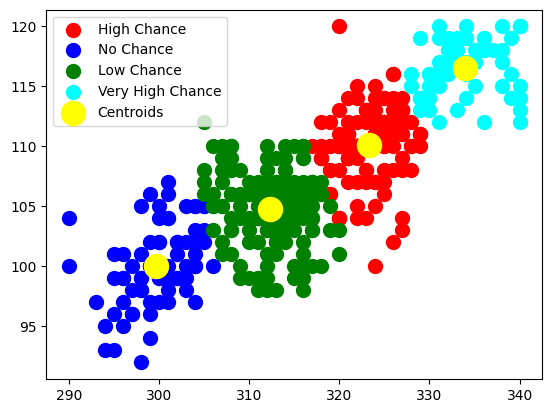

In [32]:
#visualizing the clusters
from scipy.cluster.vq import kmeans
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'High Chance')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'No Chance')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Low Chance')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 100, c = 'cyan', label = 'Very High Chance')

#plotting the centroids
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()

## BIRCH Algorithim

In [25]:
#importing the libraries
from numpy import unique, where
from sklearn.cluster import Birch

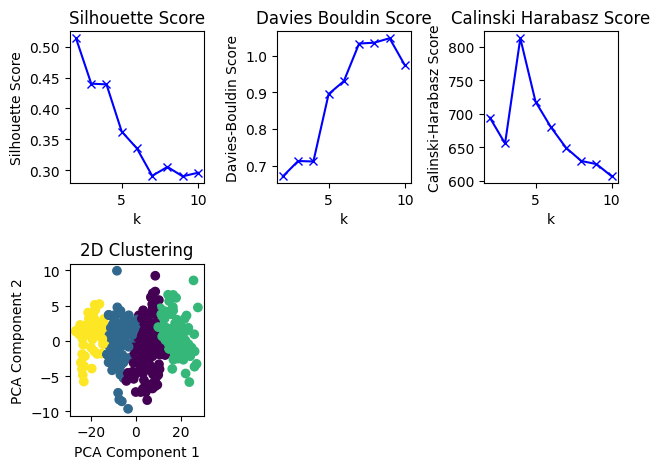

In [26]:
# Initialize Birch parameters
birch = Birch(n_clusters=None)

# Silhouette score to find the optimal number of clusters
silhouette_scores = []
K = range(2, 11)
for k in K:
    birch.set_params(n_clusters=k)
    birch.fit(x)
    labels = birch.labels_
    silhouette_scores.append(silhouette_score(x, labels))

plt.subplot(2, 3, 1)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Davies-Bouldin score to find the optimal number of clusters
db_scores = []
for k in K:
    birch.set_params(n_clusters=k)
    birch.fit(x)
    labels = birch.labels_
    db_scores.append(davies_bouldin_score(x, labels))

plt.subplot(2, 3, 2)
plt.plot(K, db_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies Bouldin Score')

# Calinski-Harabasz score to find the optimal number of clusters
ch_scores = []
for k in K:
    birch.set_params(n_clusters=k)
    birch.fit(x)
    labels = birch.labels_
    ch_scores.append(calinski_harabasz_score(x, labels))

plt.subplot(2, 3, 3)
plt.plot(K, ch_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski Harabasz Score')

# Visual assessment using PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.subplot(2, 3, 4)
birch.set_params(n_clusters=4)
birch.fit(x)
labels = birch.labels_
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Clustering')

plt.tight_layout()
plt.show()


**We can observe that the optimal number of clusters is 4**

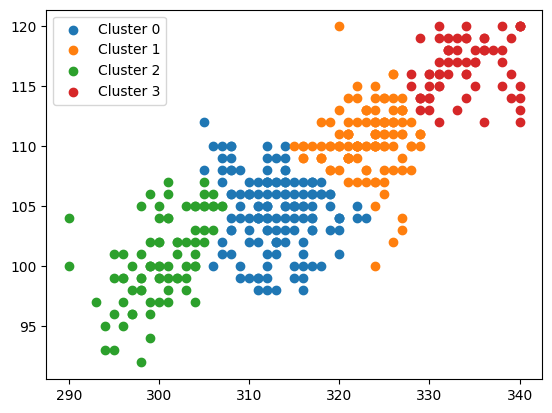

In [35]:
#defining the model
birch_model = Birch(threshold=0.5, n_clusters=4)

#training the model
birch_model.fit(x)

#assigning data points to clusters
birch_result = birch_model.predict(x)

#identifying unique clusters
birch_clusters = unique(birch_result)

#plotting the clusters  
for birch_cluster in birch_clusters:
    #getting data points that belong in this cluster
    index = where(birch_result == birch_cluster)
    #plotting
    plt.scatter(x[index, 0], x[index, 1], label=f'Cluster {birch_cluster}')


plt.legend()
plt.show()

## Gausian Mixture Model Algorithim

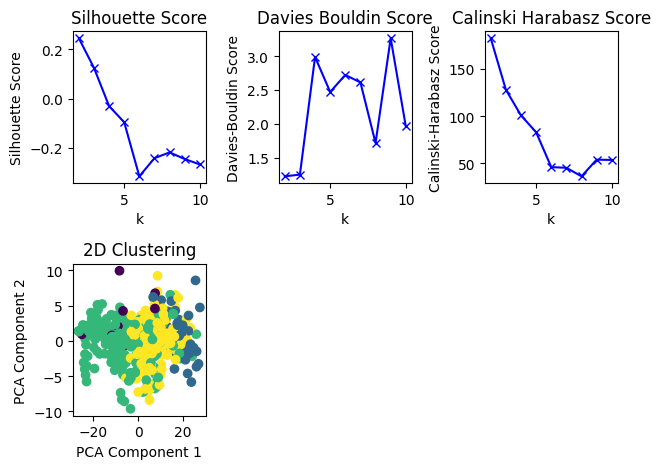

In [29]:
from sklearn.mixture import GaussianMixture

# defining the model
gmm = GaussianMixture()

# Silhouette score to find the optimal number of clusters
silhouette_scores = []
K = range(2, 11)
for k in K:
    gmm.set_params(n_components=k)
    gmm.fit(x)
    labels = gmm.predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

plt.subplot(2, 3, 1)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Davies-Bouldin score to find the optimal number of clusters
db_scores = []
for k in K:
    gmm.set_params(n_components=k)
    gmm.fit(x)
    labels = gmm.predict(x)
    db_scores.append(davies_bouldin_score(x, labels))

plt.subplot(2, 3, 2)
plt.plot(K, db_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies Bouldin Score')

# Calinski-Harabasz score to find the optimal number of clusters
ch_scores = []
for k in K:
    gmm.set_params(n_components=k)
    gmm.fit(x)
    labels = gmm.predict(x)
    ch_scores.append(calinski_harabasz_score(x, labels))

plt.subplot(2, 3, 3)
plt.plot(K, ch_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski Harabasz Score')

# Visual assessment using PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.subplot(2, 3, 4)
gmm.set_params(n_components=4)  # Set a specific number of components for visualization
gmm.fit(x)
labels = gmm.predict(x)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Clustering')

plt.tight_layout()
plt.show()


**The optimal number of clusters is 4**

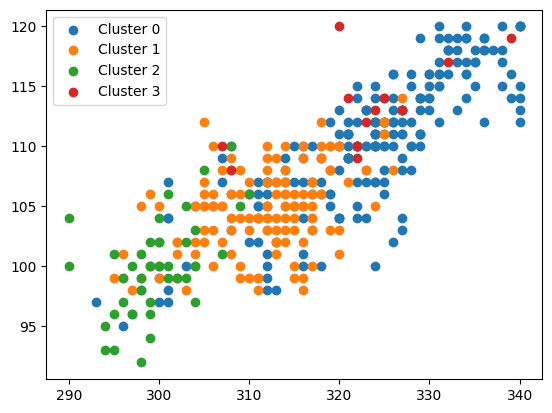

In [38]:
#defining the model
gaussian_model = GaussianMixture(n_components=4)

#training the model
gaussian_model.fit(x)

#assigning data points to clusters
gaussian_result = gaussian_model.predict(x)

#identifing unique clusters
gaussian_clusters = unique(gaussian_result)

#plotting the clusters
for gaussian_cluster in gaussian_clusters:
    index = where(gaussian_result == gaussian_cluster)
    plt.scatter(x[index, 0], x[index, 1], label=f'Cluster {gaussian_cluster}')

plt.legend()
plt.show()